In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [231]:
cars_df = pd.read_csv('CarPrice_Assignment.csv')
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [232]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [233]:
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [234]:
cars_df.drop('car_ID',axis=1,inplace=True)

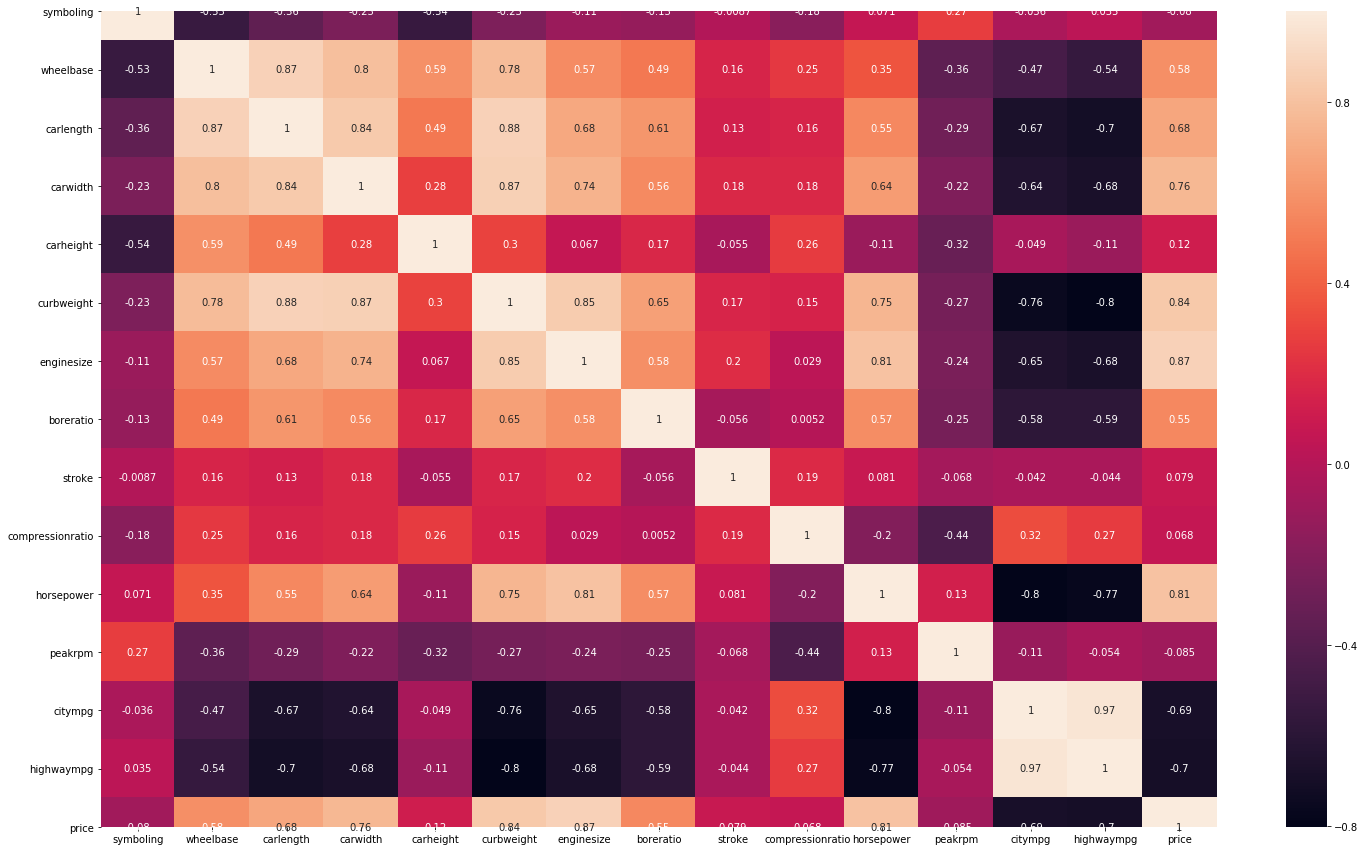

In [235]:
plt.figure(figsize = (25, 15))
sns.heatmap(cars_df.corr(), annot = True)
plt.show()

In [236]:
cars_df['symboling'] = cars_df['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

In [237]:
cars_df['car_company'] = cars_df['CarName'].apply(lambda x: x.split( )[0])
cars_df.drop('CarName',axis=1,inplace=True)

In [238]:
cars_df['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [239]:
cars_df['car_company'].replace('maxda','mazda',inplace=True)
cars_df['car_company'].replace('Nissan','nissan',inplace=True)
cars_df['car_company'].replace('porcshce','porsche',inplace=True)
cars_df['car_company'].replace('toyouta','toyota',inplace=True)
cars_df['car_company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

In [240]:
categorical_variables = list(cars_df.columns[cars_df.dtypes == 'object'])
categorical_variables

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'car_company']

In [241]:
print(cars_df[['horsepower','curbweight','enginesize']].quantile([0.01, .96]))
print(cars_df[['compressionratio']].quantile([0.01, .90]))

      horsepower  curbweight  enginesize
0.01       52.12     1819.72        70.0
0.96      182.00     3657.80       209.0
      compressionratio
0.01              7.00
0.90             10.94


In [242]:
# Outilers in price of cars
cars_df['horsepower'][np.abs(cars_df['horsepower'] > 182.00)]= 182.00
cars_df['horsepower'][np.abs(cars_df['horsepower'] > 3657.80)]= 3657.80
cars_df['enginesize'][np.abs(cars_df['enginesize'] > 209.00)]= 209.00
cars_df['compressionratio'][np.abs(cars_df['compressionratio'] > 10.94)]= 10.94

In [243]:
 cars_df= cars_df[np.abs(cars_df.price-cars_df.price.mean()) <= (3*cars_df.price.std())]

In [244]:
# Creating new variable carLWratio
cars_df['carLWratio'] = cars_df.carlength/cars_df.carwidth
# Creating new variable carWHratio
cars_df['carWHratio'] = cars_df.carwidth/cars_df.carheight
# Creating new variable PWratio
cars_df['PWratio'] = cars_df.horsepower/cars_df.curbweight
# Creating new variable HCmpgratio
cars_df['HCmpgratio'] = cars_df.highwaympg/cars_df.citympg
## droping the orignal variables
cars_df.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)

In [245]:
cars_df.groupby('car_company').price.mean().sort_values(ascending=False)

car_company
jaguar         34600.000000
porsche        31400.500000
buick          30469.333333
bmw            23947.857143
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

In [246]:
company_segment_dict = {
    'cheverolet' : 'lowtier',
    'dodge' : 'lowtier',
    'plymouth' : 'lowtier',
    'honda' : 'lowtier',
    'subaru' : 'lowtier',
    'isuzu' : 'lowtier',
    'mitsubishi' : 'lowtier',
    'renault' : 'lowtier',
    'toyota' : 'lowtier',
    'volkswagen' : 'midtier',
    'nissan' : 'midtier',
    'mazda' : 'midtier',
    'saab' : 'midtier',
    'peugeot' : 'midtier',
    'alfa-romero' : 'midtier',
    'mercury' : 'midtier',
    'audi' : 'midtier',
    'volvo' : 'midtier',
    'bmw' : 'hightier',
    'buick' : 'hightier',
    'porsche' : 'hightier',
    'jaguar' : 'hightier',
    }
cars_df['company_segment'] = cars_df['car_company'].map(company_segment_dict)
# Dropping the orignal car_company variable
cars_df.drop('car_company',axis=1,inplace=True)
cars_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio,company_segment
0,risky,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,midtier
1,risky,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,midtier
2,moderate,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,...,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,midtier
3,risky,gas,std,four,sedan,fwd,front,99.8,2337,ohc,...,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,midtier
4,risky,gas,std,four,sedan,4wd,front,99.4,2824,ohc,...,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,midtier


In [247]:
cars_df.groupby('company_segment').price.mean()

company_segment
hightier    29107.309524
lowtier      8987.369565
midtier     13231.839151
Name: price, dtype: float64

In [248]:
# Converting categorical variables with two levels to either 1 or 0
cars_df['fueltype'] = cars_df['fueltype'].map({'gas': 1, 'diesel': 0})
cars_df['aspiration'] = cars_df['aspiration'].map({'std': 1, 'turbo': 0})
cars_df['doornumber'] = cars_df['doornumber'].map({'two': 1, 'four': 0})
cars_df['enginelocation'] = cars_df['enginelocation'].map({'front': 1, 'rear': 0})
cars_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio,company_segment
0,risky,1,1,1,convertible,rwd,1,88.6,2548,dohc,...,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,midtier
1,risky,1,1,1,convertible,rwd,1,88.6,2548,dohc,...,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,midtier
2,moderate,1,1,1,hatchback,rwd,1,94.5,2823,ohcv,...,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,midtier
3,risky,1,1,0,sedan,fwd,1,99.8,2337,ohc,...,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,midtier
4,risky,1,1,0,sedan,4wd,1,99.4,2824,ohc,...,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,midtier


In [249]:
# Creating dummy variables
dummies_df = pd.get_dummies(cars_df)
# Droping 1 dummy variable and Keeping n-1 varaibles for each feature 
dummies_df.drop(['carbody_hatchback',
         'drivewheel_4wd',
         'enginetype_l',
         'cylindernumber_three',
         'fuelsystem_1bbl',
         'company_segment_lowtier'],axis=1,inplace=True)
dummies_df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'carLWratio', 'carWHratio', 'PWratio',
       'HCmpgratio', 'symboling_moderate', 'symboling_risky', 'symboling_safe',
       'carbody_convertible', 'carbody_hardtop', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'company_segment_hightier', 'company_segment_midtier'],
      dtype='object')

In [250]:
from sklearn.model_selection import train_test_split

# Splitting the avilable data into training and testing set.

dummies_df_train, dummies_df_test = train_test_split(dummies_df, train_size = 0.7, test_size = 0.3, random_state = 101)

In [251]:
from sklearn.preprocessing import MinMaxScaler
# Using MinMaxScaler to scale all the numeric variables in the same scale between 0 and 1.
scaler = MinMaxScaler()

In [252]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','carLWratio','carWHratio','PWratio','HCmpgratio','stroke','compressionratio','peakrpm','price']

dummies_df_train[num_vars] = scaler.fit_transform(dummies_df_train[num_vars])

dummies_df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_hightier,company_segment_midtier
34,1,1,1,1,0.244828,0.181536,0.209459,0.000000,0.616162,0.558376,...,0,0,0,0,0,0,0,0,0,0
46,1,1,1,1,0.324138,0.483320,0.391892,0.504854,0.525253,0.558376,...,0,0,0,0,0,0,0,1,0,0
93,1,1,0,1,0.272414,0.207913,0.243243,0.233010,0.555556,0.609137,...,0,1,0,0,0,0,0,0,0,1
188,1,1,0,1,0.368966,0.314973,0.324324,0.271845,0.611111,0.761421,...,0,0,0,0,0,1,0,0,0,1
203,0,0,0,1,0.775862,0.670675,0.567568,0.097087,0.611111,1.000000,...,0,0,0,1,0,0,0,0,0,1


In [253]:
dummies_df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_hightier,company_segment_midtier
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.893617,0.780142,0.425532,0.985816,0.427733,0.418984,0.434445,0.430627,0.545419,0.519153,...,0.014184,0.312057,0.007092,0.106383,0.007092,0.475177,0.049645,0.007092,0.106383,0.482270
std,0.309426,0.415627,0.496186,0.118672,0.212217,0.201468,0.218619,0.252524,0.153731,0.230313,...,0.118672,0.464985,0.084215,0.309426,0.084215,0.501164,0.217986,0.084215,0.309426,0.501467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.272304,0.250000,0.233010,0.469697,0.380711,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.365517,0.375097,0.398649,0.427184,0.555556,0.507614,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.544828,0.568658,0.540541,0.660194,0.616162,0.609137,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [254]:
y_train = dummies_df_train.pop('price')
X_train = dummies_df_train

In [255]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE and selecting 15 features best describing the price of cars
rfe = rfe.fit(X_train, y_train)

In [256]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 13),
 ('aspiration', False, 11),
 ('doornumber', False, 22),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 20),
 ('compressionratio', False, 8),
 ('horsepower', True, 1),
 ('peakrpm', False, 29),
 ('carLWratio', True, 1),
 ('carWHratio', False, 4),
 ('PWratio', False, 12),
 ('HCmpgratio', False, 9),
 ('symboling_moderate', False, 31),
 ('symboling_risky', False, 25),
 ('symboling_safe', False, 28),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 26),
 ('carbody_sedan', False, 27),
 ('carbody_wagon', False, 21),
 ('drivewheel_fwd', False, 24),
 ('drivewheel_rwd', False, 23),
 ('enginetype_dohc', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 7),
 ('enginetype_ohcv', False, 19),
 ('enginetype_rotor', False, 3),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', False, 6),
 ('cylindernumb

In [257]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'carLWratio', 'carbody_convertible', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_ohc', 'cylindernumber_eight',
       'cylindernumber_four', 'cylindernumber_two',
       'company_segment_hightier'],
      dtype='object')

In [258]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'stroke', 'compressionratio',
       'peakrpm', 'carWHratio', 'PWratio', 'HCmpgratio', 'symboling_moderate',
       'symboling_risky', 'symboling_safe', 'carbody_hardtop', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_six', 'cylindernumber_twelve', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'company_segment_midtier'],
      dtype='object')

In [259]:
def fit_LRM(X_train):
#Function to fit the linear regression model from the statmodel package
# Creating X_train dataframe with the selected variables
    # Adding a constant variable  
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit() 
    print(lm.summary())
    return lm

In [260]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [261]:
lm=fit_LRM(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     190.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.54e-78
Time:                        11:46:39   Log-Likelihood:                 230.37
No. Observations:                 141   AIC:                            -428.7
Df Residuals:                     125   BIC:                            -381.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [262]:
X_train1 = X_train_rfe.drop('enginetype_dohcv', axis=1)

In [263]:
lm1=fit_LRM(X_train1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     202.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.36e-79
Time:                        11:46:40   Log-Likelihood:                 229.34
No. Observations:                 141   AIC:                            -428.7
Df Residuals:                     126   BIC:                            -384.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [264]:
X_train2 = X_train1.drop('cylindernumber_two', axis=1)

In [265]:
lm2=fit_LRM(X_train2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     214.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.03e-79
Time:                        11:46:42   Log-Likelihood:                 227.92
No. Observations:                 141   AIC:                            -427.8
Df Residuals:                     127   BIC:                            -386.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [266]:
def getVIF(X_train):
    #X_train = df.drop(['const'], axis=1)
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [267]:
getVIF(X_train2)

,Features,VIF
2,curbweight,86.63
3,enginesize,35.40
6,carLWratio,34.55
1,wheelbase,32.49
0,enginelocation,26.18
5,horsepower,17.92
4,boreratio,15.73
11,cylindernumber_four,14.18
9,enginetype_ohc,7.95
12,company_segment_hightier,2.24


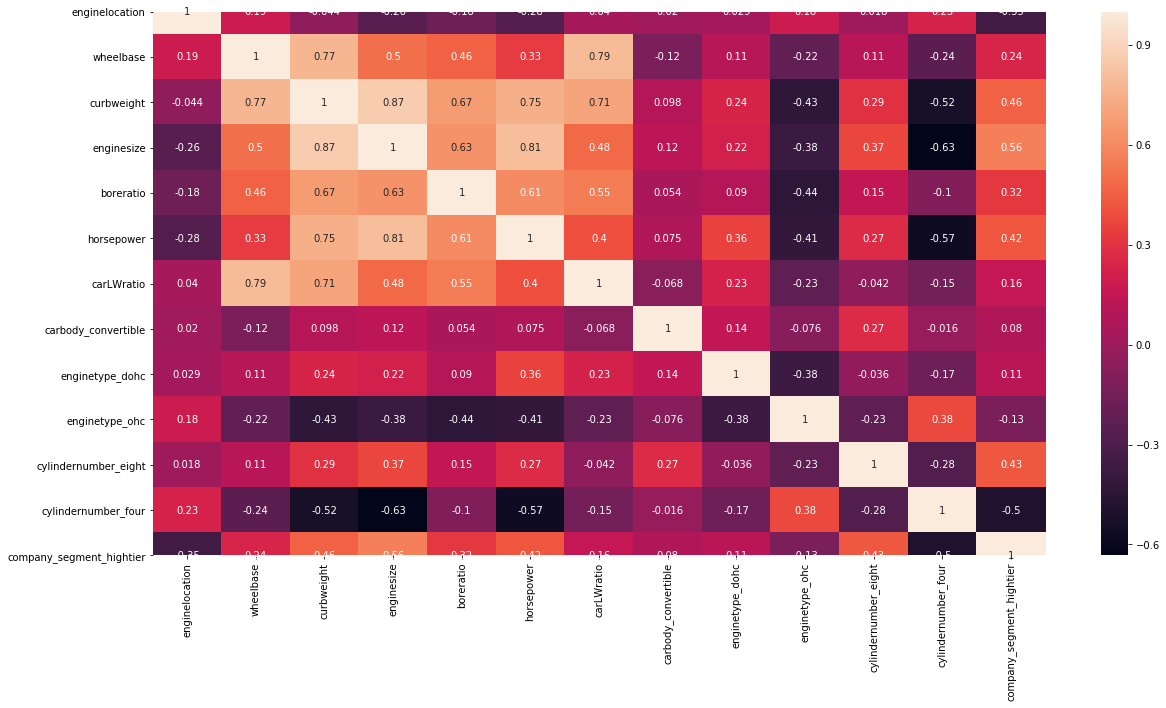

In [268]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train2.corr(),annot = True)

In [269]:
X_train3 = X_train2.drop('curbweight', axis=1)

In [270]:
lm3=fit_LRM(X_train3)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     149.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.37e-69
Time:                        11:46:47   Log-Likelihood:                 198.09
No. Observations:                 141   AIC:                            -370.2
Df Residuals:                     128   BIC:                            -331.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [271]:
getVIF(X_train3)

,Features,VIF
5,carLWratio,34.07
2,enginesize,25.98
0,enginelocation,25.82
1,wheelbase,16.81
3,boreratio,15.68
4,horsepower,14.86
10,cylindernumber_four,14.07
8,enginetype_ohc,7.48
11,company_segment_hightier,2.23
7,enginetype_dohc,1.78


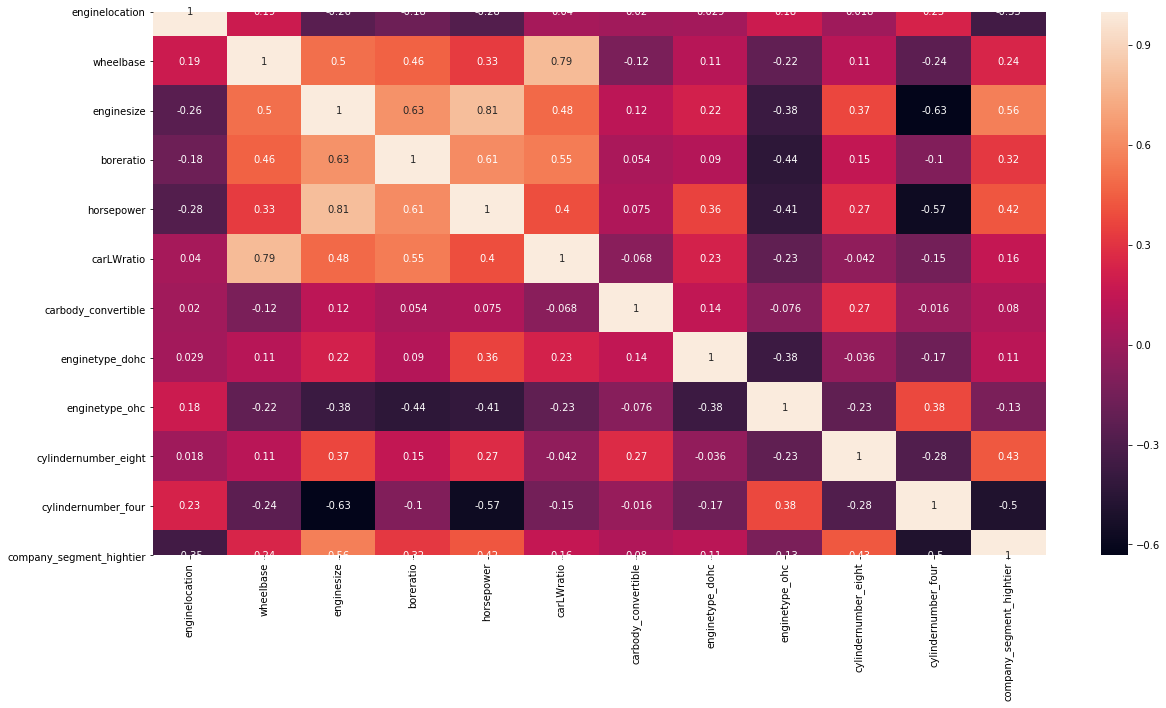

In [272]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train3.corr(),annot = True)

In [273]:
X_train4 = X_train3.drop('enginesize', axis=1)

In [274]:
lm4=fit_LRM(X_train4)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     163.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.79e-70
Time:                        11:46:52   Log-Likelihood:                 197.66
No. Observations:                 141   AIC:                            -371.3
Df Residuals:                     129   BIC:                            -335.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [275]:
X_train5 = X_train4.drop('carLWratio', axis=1)

In [276]:
lm5=fit_LRM(X_train5)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     179.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           6.28e-71
Time:                        11:46:55   Log-Likelihood:                 196.75
No. Observations:                 141   AIC:                            -371.5
Df Residuals:                     130   BIC:                            -339.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [277]:
X_train6 = X_train5.drop('enginetype_dohc', axis=1)

In [278]:
lm6=fit_LRM(X_train6)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     198.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           7.96e-72
Time:                        11:46:57   Log-Likelihood:                 196.09
No. Observations:                 141   AIC:                            -372.2
Df Residuals:                     131   BIC:                            -342.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [279]:
getVIF(X_train6)

,Features,VIF
0,enginelocation,21.94
7,cylindernumber_four,11.35
2,boreratio,11.23
3,horsepower,8.97
1,wheelbase,8.19
5,enginetype_ohc,5.53
8,company_segment_hightier,2.01
6,cylindernumber_eight,1.43
4,carbody_convertible,1.16


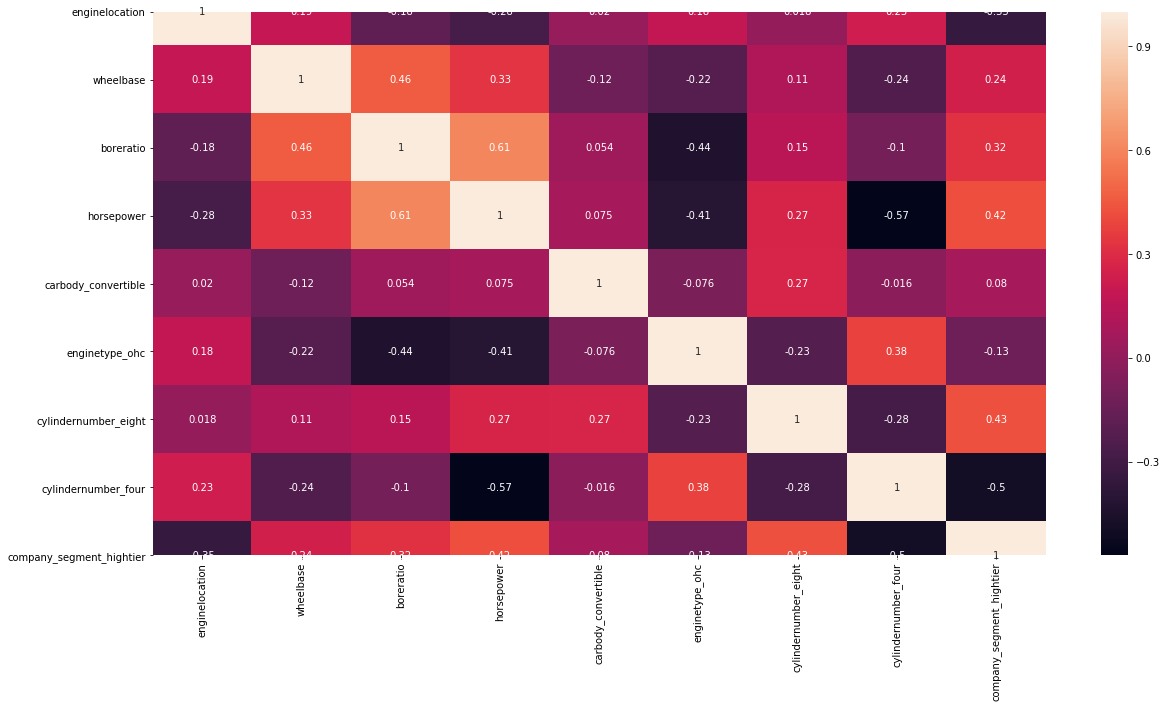

In [280]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train6.corr(),annot = True)

In [281]:
X_train7 = X_train6.drop('enginelocation', axis=1)

In [282]:
lm7=fit_LRM(X_train7)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     175.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.74e-66
Time:                        11:47:02   Log-Likelihood:                 179.96
No. Observations:                 141   AIC:                            -341.9
Df Residuals:                     132   BIC:                            -315.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [283]:
X_train8 = X_train7.drop('enginetype_ohc', axis=1)

In [284]:
lm8=fit_LRM(X_train8)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     201.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.43e-67
Time:                        11:47:04   Log-Likelihood:                 179.76
No. Observations:                 141   AIC:                            -343.5
Df Residuals:                     133   BIC:                            -319.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [285]:
X_train9 = X_train8.drop('boreratio', axis=1)

In [286]:
lm9=fit_LRM(X_train9)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     234.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.86e-68
Time:                        11:47:06   Log-Likelihood:                 178.98
No. Observations:                 141   AIC:                            -344.0
Df Residuals:                     134   BIC:                            -323.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [287]:
X_train10 = X_train9.drop('cylindernumber_eight', axis=1)

In [288]:
lm10=fit_LRM(X_train10)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     278.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.18e-69
Time:                        11:47:08   Log-Likelihood:                 177.82
No. Observations:                 141   AIC:                            -343.6
Df Residuals:                     135   BIC:                            -325.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [289]:
getVIF(X_train10)

,Features,VIF
0,wheelbase,5.07
1,horsepower,3.97
3,cylindernumber_four,2.67
4,company_segment_hightier,1.53
2,carbody_convertible,1.07


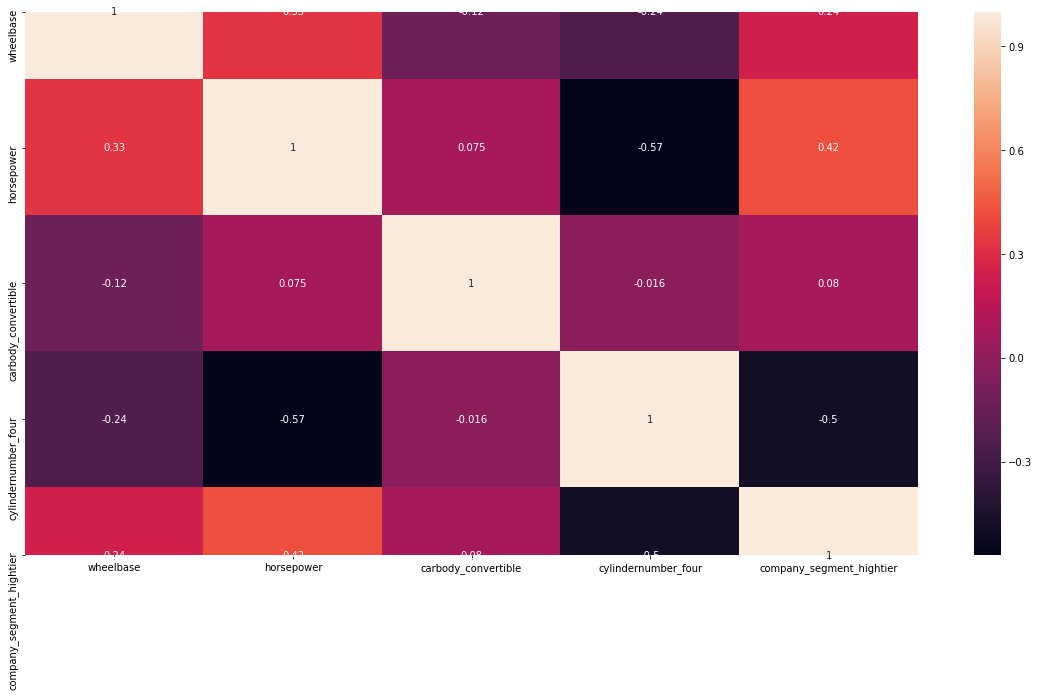

In [290]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train10.corr(),annot = True)

In [291]:
X_train10 = sm.add_constant(X_train10)
lm10 = sm.OLS(y_train,X_train10).fit() 
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     278.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.18e-69
Time:                        11:47:11   Log-Likelihood:                 177.82
No. Observations:                 141   AIC:                            -343.6
Df Residuals:                     135   BIC:                            -325.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [292]:
getVIF(X_train10)

,Features,VIF
0,const,19.60
4,cylindernumber_four,1.68
2,horsepower,1.64
5,company_segment_hightier,1.40
1,wheelbase,1.18
3,carbody_convertible,1.04


In [293]:
y_train_price = lm10.predict(X_train10)

Text(0.5, 0, 'Errors')

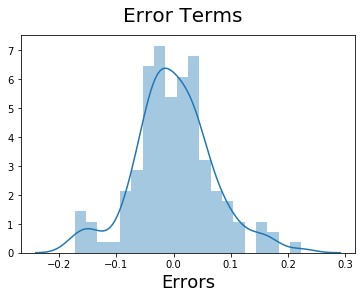

In [294]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [295]:
num_vars=num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','carLWratio','carWHratio','PWratio','HCmpgratio','stroke','compressionratio','peakrpm','price']
dummies_df_test[num_vars] = scaler.transform(dummies_df_test[num_vars])

In [296]:
y_test = dummies_df_test.pop('price')
X_test = dummies_df_test

## Now let's use our model to make predictions.

In [297]:
# Creating X_test_new dataframe by dropping variables from X_test
X_train10= X_train10.drop(['const'], axis=1)
X_test_new = X_test[X_train10.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [298]:
# Making predictions
y_pred = lm10.predict(X_test_new)

## Model Evaluation

In [299]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model r2_score: 0.9014553450856045
